# Usando o Python para resolver questões com matrizes

## Importando as bibliotecas matemáticas

In [50]:
import numpy as np
from numpy import sin, cos, tan, pi

### Criando a lista de constantes que serão utilizadas


In [119]:
# Ângulos de Rotação
theta_x = -pi/2
theta_y = 0
theta_z = -pi/2
print('Rotação da câmera:',theta_x, theta_y, theta_z)

# Ponto P no mundo, em coordenadas homogêneas
P_t = np.array([1.5, 0.2, 0.25, 1]).transpose()
P_t.shape = (4,1)
print('P:',P_t)

# Coordenada da câmera no mundo
t = np.array([0,0,0]).transpose()
t.shape = (3,1)
print('t',t)

# Parâmetros da câmera
f = 15e-3    # distância focal
rho = 10e-6  # tamanho do pixel
h = 1280.    # largura do sensor
w = 1024.    # altura do sensor
u0 = h/2     # ponto principal u
v0 = w/2     # ponto principal v

print('Parâmetros da câmera:\nDistância Focal:',f,
     '\nTamanho do Pixel',rho,
     '\nLargura da Imagem:',h,
     '\Altura da imagem:',w,
     '\Ponto Principal:',u0,v0)
print(cos(theta_x))

Rotação da câmera: -1.5707963267948966 0 -1.5707963267948966
P: [[1.5 ]
 [0.2 ]
 [0.25]
 [1.  ]]
t [[0]
 [0]
 [0]]
Parâmetros da câmera:
Distância Focal: 0.015 
Tamanho do Pixel 1e-05 
Largura da Imagem: 1280.0 \Altura da imagem: 1024.0 \Ponto Principal: 640.0 512.0
6.123233995736766e-17


### Criando as matrizes de Transformação de Coordenadas e de Parâmetros da Câmera

In [120]:
# Rotação em torno do eixo x
Rx = np.zeros((3,3))
Rx[0] = [1, 0, 0]
Rx[1] = [0, cos(theta_x), -sin(theta_x)]
Rx[2] = [0, sin(theta_x), cos(theta_x)]
print(Rx)

# Rotação em torno do eixo y
Ry = np.zeros((3,3))
Ry[0] = [cos(theta_y), 0, sin(theta_y)]
Ry[1] = [0, 1, 0]
Ry[2] = [-sin(theta_y), 0, cos(theta_y)]
print(Ry)

# Rotação em torno do eixo z
Rz = np.zeros((3,3))
Rz[0] = [cos(theta_z), -sin(theta_z), 0]
Rz[1] = [sin(theta_z), cos(theta_z), 0]
Rz[2] = [0, 0,1]
print(Rz)

# Matriz de rotação Rc
Rc = np.matmul(Rz,np.matmul(Ry,Rx))
print(Rc)

[[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00 -1.000000e+00  6.123234e-17]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]
[[ 6.123234e-17  1.000000e+00  0.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]
[[ 6.12323400e-17  6.12323400e-17  1.00000000e+00]
 [-1.00000000e+00  3.74939946e-33  6.12323400e-17]
 [ 0.00000000e+00 -1.00000000e+00  6.12323400e-17]]


In [121]:
# Matriz de Transformação Tc
Tc = np.zeros((4,4))
Tc[0] = [Rc[0,0],Rc[0,1],Rc[0,2],t[0,0]]
Tc[1] = [Rc[1,0],Rc[1,1],Rc[1,2],t[1,0]]
Tc[2] = [Rc[2,0],Rc[2,1],Rc[2,2],t[2,0]]
Tc[3] = [0,0,0,1]
print(Tc)
print(np.linalg.inv(Tc))

[[ 6.12323400e-17  6.12323400e-17  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  3.74939946e-33  6.12323400e-17  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  6.12323400e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 6.12323400e-17 -1.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 6.12323400e-17  3.74939946e-33 -1.00000000e+00 -0.00000000e+00]
 [ 1.00000000e+00  6.12323400e-17  6.12323400e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [122]:
# Matriz da câmera C
C = np.zeros((3,4))
C[0] = [f, 0, 0, 0]
C[1] = [0, f, 0, 0]
C[2] = [0, 0, 1, 0]
print(C)


[[0.015 0.    0.    0.   ]
 [0.    0.015 0.    0.   ]
 [0.    0.    1.    0.   ]]


### Projetando o ponto no referencial da câmera

In [128]:
# Projeção do ponto P no referencial da câmera
p_cam = np.matmul(C,np.matmul(np.linalg.inv(Tc),P_t))
print('Projeção:\n',p_cam)

Projeção:
 [[-0.003  ]
 [-0.00375]
 [ 1.5    ]]


In [124]:
# Coordenadas não-homogêneas do ponto no referencial da câmera
x_c = p_cam[0]/p_cam[2]
y_c = p_cam[1]/p_cam[2]
print('Coodenadas não-homogêneas:',x_c,y_c)

Coodenadas não-homogêneas: [-0.002] [-0.0025]


In [125]:
# Projetando o ponto do referencial da câmera na imagem
u = (x_c/rho) + u0
v = (y_c/rho) + v0
print('Coordenadas em pixel:',u, v)

Coordenadas em pixel: [440.] [262.]


### Utilizando a Matriz da Câmera diretamente
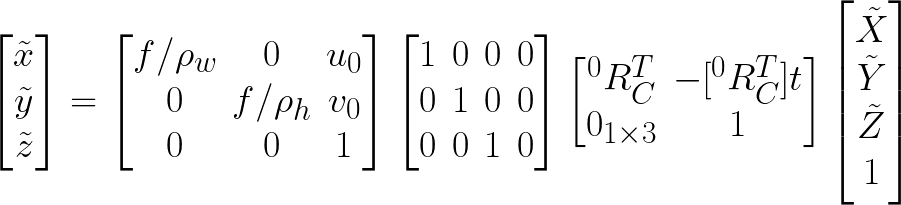

In [130]:
# Matriz K
K = np.zeros((3,3))
K[0] = [f/rho, 0, u0]
K[1] = [0, f/rho, v0]
K[2] = [0, 0, 1]
print('Matriz K:\n',K)

Matriz K:
 [[1.50e+03 0.00e+00 6.40e+02]
 [0.00e+00 1.50e+03 5.12e+02]
 [0.00e+00 0.00e+00 1.00e+00]]


In [132]:
# Matriz C'
C_ = np.zeros((3,4))
C_[0,0] = 1
C_[1,1] = 1
C_[2,2] = 1
print('Matriz C\':\n',C_)

Matriz C':
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [135]:
# Coordenadas homogêneas
p_cam_t = np.matmul(K,np.matmul(C_,np.matmul(np.linalg.inv(Tc),P_t)))
print('Coordendas homogêneas em pixel:\n',p_cam_t)

Coordendas homogêneas em pixel:
 [[660. ]
 [393. ]
 [  1.5]]


In [136]:
# Transformando em coordenadas na imagem, em pixels
u_cam = p_cam_t[0]/p_cam_t[2]
v_cam = p_cam_t[1]/p_cam_t[2]
print('Coordenadas em pixel na imagem:\n',u_cam,v_cam)

Coordenadas em pixel na imagem:
 [440.] [262.]
